# Conditional frequency distributions

## 1. Text corpora

The Brown corpus(1961) contians text from 500 sources, categorized by genre(e.g. news, editorial, hobbies, fiction, etc.)

In [1]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to C:\Users\yi
[nltk_data]     quan\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [6]:
brown.words(categories='lore')

['In', 'American', 'romance', ',', 'almost', 'nothing', ...]

## 2. Conditional frequency distrbutions

In [7]:
cfd = nltk.ConditionalFreqDist((genre,word)
                              for genre in brown.categories()
                              for word in brown.words(categories=genre))

In [8]:
cfd['news']

FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

In [9]:
cfd['science_fiction']

FreqDist({',': 791, '.': 786, 'the': 652, 'of': 321, 'to': 305, 'and': 278, '``': 235, "''": 235, 'a': 222, 'was': 198, ...})

In [10]:
from nltk.corpus import udhr

In [11]:
languages = ['English', 'German_Deutsch', 'Swahili_Kiswahili', 'Hungarian_Magyar']

In [12]:
nltk.download('udhr')

[nltk_data] Downloading package udhr to C:\Users\yi
[nltk_data]     quan\AppData\Roaming\nltk_data...
[nltk_data]   Package udhr is already up-to-date!


True

#### Can we find evidence of compounding?

In [13]:
cfd = nltk.ConditionalFreqDist((lang,len(word)) 
                              for lang in languages
                              for word in udhr.words(lang+'-Latin1'))

In [14]:
cfd.tabulate()

                    1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22 
          English 185 340 358 114 169 117 157 118  80  63  50  12  11   6   1   0   0   0   0   0   0   0 
   German_Deutsch 171  92 351 103 177 119  97 103  62  58  53  32  27  29  15  14   3   7   5   2   1   0 
 Hungarian_Magyar 302 129  72 152 112 114  91 109  90 105  71  48  38  17  13   8   3   7   2   1   0   1 
Swahili_Kiswahili 194 386 214 365 165 183 135 101  53  46  23  11   8   2   1   0   0   0   0   0   0   0 


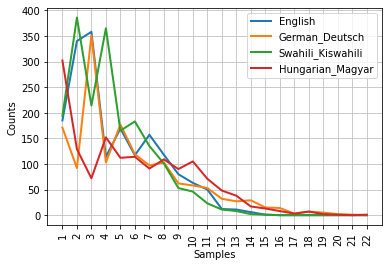

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
cfd.plot()

## 3.Generating fake news

Using bigrams to produce random text

In [34]:
s = ['The', 'cat', 'sat', 'on', 'the', 'mat', '.']

In [35]:
list(nltk.bigrams(s))

[('The', 'cat'), ('cat', 'sat'), ('sat', 'on'), ('on', 'the'), ('the', 'mat')]

In [18]:
text = brown.words(categories='news')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [19]:
def generate_text(cfdist, word, num=50):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

In [32]:
cfd.get('government')

FreqDist({'.': 6, ',': 4, 'would': 3, 'and': 3, 'decided': 3, 'to': 2, 'is': 2, 'of': 2, 'itself': 2, 'as': 2, ...})

In [33]:
generate_text(cfd,'government')

government . The President Kennedy , and the first time . The President Kennedy , and the first time . The President Kennedy , and the first time . The President Kennedy , and the first time . The President Kennedy , and the first time . The President Kennedy 